# STA 141B Assignment 2

Due __Jan 29, 2019__ by 11:59pm. Submit by editing this file, committing the changes with git, and then pushing to your private GitHub repo for the assignment. This assignment will be graded for correctness.

Please do not rename this file or delete the exercise cells, because it will interfere with our grading tools. Put your answers in new cells after each exercise. You can make as many new cells as you like. Use code cells for code and Markdown cells for text. Answer all questions with complete sentences.

The purpose of this assignment is to practice using data frames to index, slice, reshape, aggregate, and group data.

## Indexing

__Exercise 1.1 (10 points).__ Give three examples of indexing a data frame with `[ ]`, `.loc[ ]`, and `.iloc[ ]`, respectively. Explain how each of these indexing methods is different.

In [761]:
import pandas as pd
import numpy as np
import math
import re

df_ex1 = pd.DataFrame({"x": [11, 23, 33, 46 ], "y": ["apple", "bear", "cat", "juice"], "z":[100,200,300,400]})
df_ex1

,x,y,z
0,11,apple,100
1,23,bear,200
2,33,cat,300
3,46,juice,400


In [494]:
# 1. index by []
x1=df_ex1[0:4]["x"]
x1

0    11
1    23
2    33
3    46
Name: x, dtype: int64

**-When using [ ] for indexing, we could generally entered position, name and condition inside [ ]. However, this method has an exception. It can be only slice by name or condition for with an interger index.**

In [511]:
# 2. index by .loc[]
x2=df_ex1.loc[0:, "x"]
x2

0    11
1    23
2    33
3    46
Name: x, dtype: int64

**-When using .loc[ ] for indexing, we could index by name or condition.**

In [512]:
# 3. index by .iloc[]
x3=df_ex1.iloc[0:,0]
x3

0    11
1    23
2    33
3    46
Name: x, dtype: int64

**-When using .iloc[ ] for indexing, we could index only by position.**

__Exercise 1.2 (10 points).__ What do negative indexes (as in `x[-1]`) do in Python? Create and try three examples of negative indexes for lists, NumPy arrays, and data frames, respectively. Then explain what you think negative indexes do. Confirm your explanation by linking to a relevant page in the Python, NumPy, or Pandas documentation.

In [513]:
# 1. list
a=[1,2,3,4]
x=a[-1]
x

4

**-This example illustrated that negative indexes can return the last element of a list.**

In [514]:
# 2. Numpy arrays
b = np.array([1, 2, 3])
y=b[-1]
y

3

**-This example illustrated that negative indexes can return the last element of an NumPy array.**

In [515]:
# 3. data frames
c = pd.DataFrame({"x": [11, 23, 33, 46 ], "y": ["apple", "bear", "cat", "juice"],"z":[100,200,300,400]})
c
z = c.iloc[-1]
z

x       46
y    juice
z      400
Name: 3, dtype: object

**-This example illustrated that negative indexes can return the last element from each column of a data frame.(or say the last row of a dataframe)**

***Summary:** <br />
  Negative indexes could help us return the tail part of lists, Numpy arrays and data frames. The function can be supported by the follow documentations.<br />
. Lists: [Docu_1](https://docs.python.org/3/tutorial/introduction.html#lists)<br />
. NumPy arrays: [Docu_2](https://docs.scipy.org/doc/numpy-1.15.1/reference/arrays.indexing.html)<br />
. Pandas: [Docu_3](http://pandas.pydata.org/pandas-docs/version/0.12/indexing.html#slicing-ranges)<br />

***Learn from documentation**: Negative index is applied in python to index starting from the last element of the list, tuple or any other container class which supports indexing. -1 is refering to the last index, -2 is refering to the second last index and so on. This is useful when we don’t have the length of the container, and also would like to reference a position relative to the last index without an extra step for calculating the length.




__Exercise 1.3 (10 points).__ Give an example and explain Pandas' data alignment (or index alignment) feature.

In [763]:
DATA1=pd.DataFrame([[11, 23, 33],[15,29,67]],columns=["x","y","z"],index=[1,2])
DATA2=pd.DataFrame([[1, 2, 3],[5,2,7]],columns=["w","y","z"],index=[1,2])
DATA1+DATA2

,w,x,y,z
1,NaN,NaN,25,36
2,NaN,NaN,31,74


***Explanation:**<br />
Pandas' data alignment can allow us to apply various operations on two Series or Dataframes which have different length. Most importantly, this process is applied according to the row index. It will automatically detect the longest Series and align other Series with the longest one. It will return "NaN" for the no corresponding part of two dataframes/Series.

By the example, we could also observe that none of columns in two dataset had been removed during our operations. All the columns in dataset 1 and dataset 2 are included in the result. The data alignment perform the operation on columns which have the same row index and both existed in two datasets. We also find that because of the length difference, Pandas' data alginment automatically replaced the missing values with "NaN" and maintain them in our result.




__Exercise 1.4 (10 points).__ Explain the difference between the similarly-named data frame methods `.reindex()` and `.reset_index()`. Give two examples to show what each method respectively does.

How might these methods be useful when combined with Pandas' data alignment feature?

*Hint: Besides the Pandas documentation, `.reindex()` is explained in Python for Data Analysis 5.2, and `.reset_index()` is explained [here](https://jakevdp.github.io/PythonDataScienceHandbook/03.05-hierarchical-indexing.html#Index-setting-and-resetting).*

In [684]:
df = pd.DataFrame({"fruit": ["apple", "bear", "apple", "bear"], "amount": [1,2,6,3]},index=["Jan","Feb","Dec","Oct"])

# 1.apply .reindex()
ordered=["Jan","Feb","Oct","Dec"]
df1=df.reindex(ordered)
print(df1)

# 2.apply .reset_index()
df2 = df.reset_index()
print(df2)


     fruit  amount
Jan  apple       1
Feb   bear       2
Oct   bear       3
Dec  apple       6
  index  fruit  amount
0   Jan  apple       1
1   Feb   bear       2
2   Dec  apple       6
3   Oct   bear       3


### Difference between .reindex() and .reset_index()

***Explanation:**

**.reindex():** The function allow us to change the order of the existing index and we are also able to assign indexes of different length to the dataset. It has very similar attribute as Pandas' data alignment. When the length of new indexes is larger than the original rows, the function will automatically fill the missing value as "NaN'. This function is a useful tool for tidy the messy dataset and sort the data frame into a organized way.


**.reset_index():** The function will put the original index into our dataframe and saved it as a column. It will automatically assign new integer indexes for the original dataframe. we frequently use the function to reset a data frame after Pandas' data alignment. Since when we applied data alignment, it is a usual case that new indexes will be added into the dataset, and the new indexes may contain useful information that we want to present in our dataset.

**.Supportive Documentation:**


[reindex](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reindex.html)


[reset_index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html)





## Aquaculture Data Set 🐟🦐

The U.S. Department of Agriculture publishes data sets about U.S. food production online. In the next few exercises, you'll use the [U.S. Aquaculture data set](https://www.ers.usda.gov/webdocs/DataFiles/47759/AquacultureTradeFull.xls?v=661.2). The data set contains information about fish and shellfish imports and exports (more info [here](https://www.ers.usda.gov/data-products/aquaculture-data/)). The data set is published as a single Excel file.

__Exercise 1.5 (20 points).__ Download the aquaculture data set, open it in your favorite spreadsheet program, and take a moment to familiarize yourself with the data.

Use Pandas to _read_ the sheet that contains total imports from the Excel file. Clean the data frame so that it's _tidy_ (more info [here](http://shzhangji.com/blog/2017/09/30/pandas-and-tidy-data/) and [here](https://www.jstatsoft.org/article/view/v059i10)). In particular, make sure that:

* years are in a single column
* measurements are in a single column
* all observations indicate whether they are value or volume
* fish type and preparation are in separate columns
* footnotes are removed

For example, after tidying the data, I ended up with a multiindex series that looked like:

```
measurement     product  format             year
volume_1000lbs  Trout     fresh and frozen  1989    1467.892443
                                            1990    5898.067124
                                            1991    3866.117733
                                            1992    6200.029791
                                            1993    4744.615508
                                            ...
dtype: float64
```

Your result does not have to be identical, but should have a similar shape. Your result can be a data frame with multiple columns, or a multiindex series.

Convert your code into a function `read_aqua_mx()` with appropriate documentation and parameters. Test that your function can also correctly read the total exports sheet.

## 1.5 Function Design:

In [690]:
# Design function read_aqua_mx()
# Import re packages
import re

def read_aqua_mx(file_path, sheet_number):
    """
    The function is designed to read a input messy data set and convert into a tidy format 
    for analysis.
    * file_path = enter the file location
    * sheet_number = enter the certain data set you want to analyze.
    """
    
    data=pd.read_excel(file_path,
                 sheet_name = sheet_number,
                 header = 1)
    
    # 1.remove unuseful rows and columns 
    data=data.iloc[:,0:-2]
    data = data.iloc[0:len(data)-3]
    
    # 2.find measurements and products
    data.columns.values[[0,1]] = ["measurement", "product"]
    data.loc[0:13, "measurement"] = "volume_1000lbs"
    data.loc[14:, "measurement"] = "value_1000USD"
    
    # 3.sort out product name and format 
    product = data['product'].astype(str)
    product = [re.sub('[0-9]+/','',prod) for prod in product]
    data['product'] = product
    
    # 4.add product name and format column in the data
    prod=data['product'].str.split(',', n=1).str.get(0)
    data['format']=data['product'].str.split(',', n=1).str.get(1)
    data['product'] =prod
    
    # 5.melt the dataset
    new_df=pd.melt(data, id_vars=["measurement", "product","format"])
    new_df = new_df.rename(columns={'variable': 'year'})
    new_df

    # 6.tidy the dataset
    new_df=new_df.sort_values(by=['product','format', 'year'], ascending=True)
    
    # 7. return the result
    return new_df;


## 1.5 Display Function Result:

In [703]:
# Show function result--Import
IM=read_aqua_mx('./AquacultureTradeFull.xls',1)
IM

,measurement,product,format,year,value
5,volume_1000lbs,Atlantic salmon,fillets,1989,NaN
15,value_1000USD,Atlantic salmon,fillets,1989,NaN
35,volume_1000lbs,Atlantic salmon,fillets,1990,NaN
45,value_1000USD,Atlantic salmon,fillets,1990,NaN
65,volume_1000lbs,Atlantic salmon,fillets,1991,NaN
75,value_1000USD,Atlantic salmon,fillets,1991,NaN
95,volume_1000lbs,Atlantic salmon,fillets,1992,NaN
105,value_1000USD,Atlantic salmon,fillets,1992,NaN
125,volume_1000lbs,Atlantic salmon,fillets,1993,NaN
135,value_1000USD,Atlantic salmon,fillets,1993,NaN


In [699]:
# Show function result--Export
EP=read_aqua_mx('./AquacultureTradeFull.xls',2)
EP

,measurement,product,format,year,value
1,volume_1000lbs,Atlantic salmon,fresh,1989,NaN
13,volume_1000lbs,Atlantic salmon,fresh,1989,NaN
26,volume_1000lbs,Atlantic salmon,fresh,1990,NaN
38,volume_1000lbs,Atlantic salmon,fresh,1990,NaN
51,volume_1000lbs,Atlantic salmon,fresh,1991,476.160873
63,volume_1000lbs,Atlantic salmon,fresh,1991,1648.561000
76,volume_1000lbs,Atlantic salmon,fresh,1992,1297.673579
88,volume_1000lbs,Atlantic salmon,fresh,1992,4574.363000
101,volume_1000lbs,Atlantic salmon,fresh,1993,4019.054566
113,volume_1000lbs,Atlantic salmon,fresh,1993,11202.817000


__Exercise 1.6 (20 points).__ What kind of fish or shellfish did the U.S. import the most of in 2017, and how much was imported? What was the total value of the most imported fish or shellfish, and was its value highest across all imports in 2017?

Was the most imported fish or shellfish different in previous years?

## 1.6 Basic Analysis:

In [662]:
# *Import fish or shellfish data analysis*
df_ip=read_aqua_mx('./AquacultureTradeFull.xls',1)
df_ip_2017=df_ip[df_ip.year == "2017"]
df_ip_2017

# **Import 2017 volume exploration:
ip_2017_vl=df_ip_2017[df_ip_2017.measurement=="volume_1000lbs"]  # sort out the data for volume part
max_17_vl=ip_2017_vl.value.max()                                 # find max volume
ip_17_vlmax=ip_2017_vl[ip_2017_vl.value==max_17_vl]
print(ip_17_vlmax)                                               # print result


# **Import 2017 value exploration:
ip_2017_va=df_ip_2017[df_ip_2017.measurement=="value_1000USD"]   # sort out the data for value part
max_17_va=ip_2017_va.value.max()                                 # find max value
ip_17_vamax=ip_2017_va[ip_2017_va.value==max_17_va]
print(ip_17_vamax)                                               # print result


        measurement product   format  year         value
848  volume_1000lbs  Shrimp   frozen  2017  1.139623e+06
       measurement product   format  year        value
858  value_1000USD  Shrimp   frozen  2017  5063378.614


## 1.6 Function Setting:

In [762]:
# Define a function to return max value or volume for each year
def return_max (parameter, df, yr):
    """
    parameter = user decide what kind of dataset return (volume or value)
    df = dataframe
    yr = enter a year for finding maximum
    """
    df=df.loc[df.measurement==parameter]
    df["year"]=pd.to_numeric(df["year"])
    df_year=df[df.year==yr]
    max_res=df_year.value.max()
    max_line=df_year[df_year.value==max_res]
    return max_line;


# **Previous years import analysis:
df_ip["year"]=pd.to_numeric(df_ip["year"])
df_ip["year"].describe()


# The range of year is between 1989 to 2017
yr_list=range(1989, 2018)
yr_list


# Define a function which return a dataframe that contains the maximum result of each year
def max_data (parameter, years, df):
    new_df=pd.DataFrame([])
    for year in years:
        max_line=return_max(parameter,df,year)
        new_df=new_df.append(max_line)
    return new_df;


### 1.maximum value

In [637]:
# Import 1989 - 2017 maxmimum volume summary:
res1=max_data("value_1000USD",yr_list ,df_ip)
res1

/Users/Sssiyuan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,measurement,product,format,year,value
18,value_1000USD,Shrimp,frozen,1989,1615447.297
48,value_1000USD,Shrimp,frozen,1990,1521478.931
78,value_1000USD,Shrimp,frozen,1991,1713991.706
108,value_1000USD,Shrimp,frozen,1992,1882277.939
138,value_1000USD,Shrimp,frozen,1993,1998297.685
168,value_1000USD,Shrimp,frozen,1994,2459705.340
198,value_1000USD,Shrimp,frozen,1995,2338650.359
228,value_1000USD,Shrimp,frozen,1996,2136372.275
258,value_1000USD,Shrimp,frozen,1997,2558057.525
288,value_1000USD,Shrimp,frozen,1998,2637951.912


### 2.maximum volume

In [638]:
# Import 1989 - 2017 maxmimum value summary:
res2=max_data("volume_1000lbs",yr_list ,df_ip)
res2

/Users/Sssiyuan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,measurement,product,format,year,value
8,volume_1000lbs,Shrimp,frozen,1989,4.726986e+05
38,volume_1000lbs,Shrimp,frozen,1990,4.645422e+05
68,volume_1000lbs,Shrimp,frozen,1991,4.998660e+05
98,volume_1000lbs,Shrimp,frozen,1992,5.585838e+05
128,volume_1000lbs,Shrimp,frozen,1993,5.562152e+05
158,volume_1000lbs,Shrimp,frozen,1994,5.800261e+05
188,volume_1000lbs,Shrimp,frozen,1995,5.396358e+05
218,volume_1000lbs,Shrimp,frozen,1996,5.078283e+05
248,volume_1000lbs,Shrimp,frozen,1997,5.721151e+05
278,volume_1000lbs,Shrimp,frozen,1998,5.994791e+05


**Summary:**<br />
**(1)** By exploring the import fish and shellfish dataset, we found that in 2017 frozen shrimp was the most imported fish. The total imported amount is about **1.139623e+09 lbs**. we also found that the total value of the most imported fish is frozen shrimp. Its value is about **USD 5063378614**  and it is the highest value across all imports in 2017.<br />
<br />
**(2)** Through sorting the above dataset, we summarized the maximum of value and volume from year 1989 to 2016. It clearly demonstrated us that the frozen shrimp has was always the most imported fish in previous years. It has the  highest value both in total imported volume and imported value from 1989 to 2017.


__Exercise 1.7 (20 points).__ Repeat the analysis from Exercise 1.6 for exports.

Are there any fish or shellfish that the U.S. imports and also exports?

## 1.7 Basic Analysis:

In [645]:
# *Export fish or shellfish data analysis*
df_ep=read_aqua_mx('./AquacultureTradeFull.xls',2)
df_ep_2017=df_ep[df_ep.year == "2017"]

# **Export 2017 volume exploration:
ep_2017_vl=df_ep_2017[df_ep_2017.measurement=="volume_1000lbs"]  # sort out the data for volume part
max_17_vl=ep_2017_vl.value.max()                                 # find max volume
ep_17_vlmax=ep_2017_vl[ep_2017_vl.value==max_17_vl]
print(ep_17_vlmax)                                               # print result


# **Export 2017 value exploration:
ep_2017_va=df_ep_2017[df_ep_2017.measurement=="value_1000USD"]   # sort out the data for value part
max_17_va=ep_2017_va.value.max()                                 # find max value
ep_17_vamax=ep_2017_va[ep_2017_va.value==max_17_va]
print(ep_17_vamax)                                               # print result


        measurement         product    format  year          value
788  volume_1000lbs  Pacific salmon   frozen   2017  427476.565153
       measurement         product    format  year       value
800  value_1000USD  Pacific salmon   frozen   2017  767735.935


In [646]:
# Export 1989 - 2017 maxmimum volume summary:
res1=max_data("value_1000USD",yr_list ,df_ep)
res1

/Users/Sssiyuan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,measurement,product,format,year,value
16,value_1000USD,Pacific salmon,frozen,1989,684311.391
44,value_1000USD,Pacific salmon,frozen,1990,627822.623
72,value_1000USD,Pacific salmon,frozen,1991,406119.213
100,value_1000USD,Pacific salmon,frozen,1992,633494.176
128,value_1000USD,Pacific salmon,frozen,1993,534045.874
156,value_1000USD,Pacific salmon,frozen,1994,476914.408
184,value_1000USD,Pacific salmon,frozen,1995,479251.823
212,value_1000USD,Pacific salmon,frozen,1996,398091.211
240,value_1000USD,Pacific salmon,frozen,1997,251815.627
269,value_1000USD,Salmon,canned and prepared,1998,194393.172


In [705]:
# Export 1989 - 2017 maxmimum value summary:
res2=max_data("volume_1000lbs",yr_list ,df_ep)
res2

/Users/Sssiyuan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,measurement,product,format,year,value
4,volume_1000lbs,Pacific salmon,frozen,1989,298450.200596
32,volume_1000lbs,Pacific salmon,frozen,1990,286111.096609
60,volume_1000lbs,Pacific salmon,frozen,1991,240298.881693
88,volume_1000lbs,Pacific salmon,frozen,1992,279841.729252
116,volume_1000lbs,Pacific salmon,frozen,1993,302896.164780
144,volume_1000lbs,Pacific salmon,frozen,1994,260463.630981
172,volume_1000lbs,Pacific salmon,frozen,1995,266715.116649
200,volume_1000lbs,Pacific salmon,frozen,1996,223360.464424
228,volume_1000lbs,Pacific salmon,frozen,1997,152521.475363
256,volume_1000lbs,Pacific salmon,frozen,1998,105876.352051


In [760]:
# Import and Export Comparison

# (Imported) sea fishes/shell fishes
IM_format = IM['format']
IM_product = IM["product"]
IM_format = IM_format.replace(np.nan, '', regex=True)
IM_ani = IM_product + IM_format
list(set(IM_ani))

# (Exported) sea fishes/shell fishes
EP_format = EP['format']
EP_product = EP["product"]
EP_format = EP_format.replace(np.nan, '', regex=True)
EP_ani = EP_product + EP_format
list(set(EP_ani))

# Sort out the sea fishes/shell fishes that both be imported and exported
total=IM_ani.append(EP_ani)
set(total)

{'Atlantic salmon fillets',
 'Atlantic salmon fresh',
 'Atlantic salmon frozen',
 'Clams ',
 'Mussels ',
 'Ornamental fish',
 'Oysters ',
 'Pacific salmon fresh ',
 'Pacific salmon frozen ',
 'Salmon canned and prepared ',
 'Scallops ',
 'Shrimp fresh and prepared ',
 'Shrimp frozen',
 'Tilapia ',
 'Trout fresh and frozen',
 'Trout live'}

**Summary:**<br />
**(1)** By exploring the export fish and shellfish dataset, we found that in 2017 frozen Pacific salmon was the most imported fish. The total imported amount is about 427476.565153 lbs. we also found that the total value of the most imported fish is frozen Pacific salmon. Its value is about 767735.935 USD and it is the highest value across all exports in 2017.<br />
<br />
**(2)** Also by sorting the above dataset, we summarized the maximum of value and volume from year 1989 to 2016 of export fish and shellfish. It clearly demonstrated us that the frozen Pacific salmon has was always the most exported fish in previous years. However, when we exploring the total value of exported sea fishes, frozen pacific salmon is not always in the 1st position in the previous years. In **1998, 2001, 2002, 2003 and 2004**, canned and prepared salmon has the largest total export value.<br />
<br />
**(3)** By comparing the sea fishes/shellfishes list for imports and exports, we found that all of fish and shell fish in our dataset is both being imported and exported. Those sea fishes are: **Atlantic salmon(fillets), Atlantic salmon(fresh), Atlantic salmon(frozen), Clams, Mussels, Ornamental fish, Oysters, Pacific salmon(fresh), Pacific salmon(frozen), Salmon(canned and prepared), Scallops, Shrimp(fresh and prepared), Shrimp(frozen), Tilapia, Trout(fresh and frozen), Trout(live).**



__Exercise 1.8 (20 points).__ What are the top five countries the U.S. imported shrimp from in 2017? _You'll need to read another sheet from the data set for this question._

Use a chart to show how volume imported has changed over the years for all countries that have ever been a top five source of shrimp.

## 1.8 Data cleaning and Function setting:

In [602]:
# **Imported shrimp analysis**

# 1. Import data set
df_sp_ip=pd.read_excel('./AquacultureTradeFull.xls',
                 sheet_name = 7,
                 header = 1)
# 2. Basic data cleaning
df_sp_ip=df_sp_ip.iloc[0:134,0:32]

# 3. Assign different shrimp types inside dataset
df_sp_ip.columns.values[[0,1,2]]=["type","code","country"]
df_sp_ip.loc[0:134,"type"] = "Total"


# 4. Clarify first three columns of dataset into useful information
df_sp_ip=pd.melt(df_sp_ip, id_vars=['type', 'country', 'code'])

# 5. Tidy the format of dataset
df_sp_ip=df_sp_ip.rename(columns={'variable': 'year'})
df_sp_ip=df_sp_ip.sort_values(by=['type','country', 'year'], ascending=True)

# 6. Sort the dataset into the "Total" part
df_sp_ip=df_sp_ip[df_sp_ip.type=="Total"]
df_sp_ip

# *Define a function which return the top five countries the U.S. imported shrimp from for each year
# *step1: create a function that return top five countries for one year
def return_max_five(df, yr):
    df["year"]=pd.to_numeric(df["year"])
    df=df[df.year==yr]
    new_df=df.sort_values(by=['value'], ascending=False)
    new_df=new_df.iloc[0:5,]
    return new_df;
    
# *step2: create a function that return top five countries for every year
def five_data(df, yrs):
    new_df=pd.DataFrame([])
    for year in yrs:
        max_five=return_max_five(df,year)
        new_df=new_df.append(max_five)
    return new_df;
        

In [607]:
# Get top five countries for year 1989 to 2017
res=five_data(df_sp_ip,yr_list)
res=res.sort_values(by=['country', 'year'], ascending=True)
res

,type,country,code,year,value
4,Total,China (Mainland),5700.0,1989,102989.075463
138,Total,China (Mainland),5700.0,1990,126638.650905
272,Total,China (Mainland),5700.0,1991,77414.115443
406,Total,China (Mainland),5700.0,1992,108974.427981
540,Total,China (Mainland),5700.0,1993,68343.076970
674,Total,China (Mainland),5700.0,1994,50493.604069
808,Total,China (Mainland),5700.0,1995,32314.209486
1076,Total,China (Mainland),5700.0,1997,28401.699892
1478,Total,China (Mainland),5700.0,2000,40072.574133
1612,Total,China (Mainland),5700.0,2001,62080.043492


## 1.8 Analysis & Response:

In [629]:
data_2017=return_max_five(df_sp_ip,2017)
data_2017.country

3754        India
3755    Indonesia
3752     Thailand
3753      Ecuador
3757      Vietnam
Name: country, dtype: object

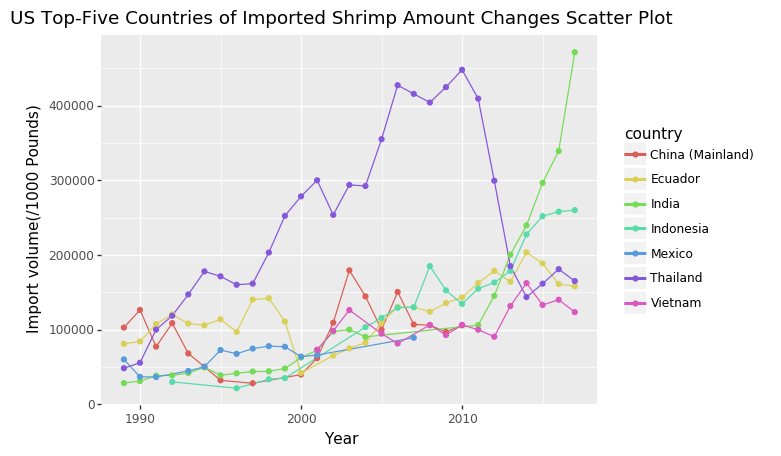

<ggplot: (7557252514)>

In [630]:
# Create a scatter plot to demonstrate the volume changes over years(1989 - 2017)
from plotnine import *

# Use ggplot to generate the image
scp=(
   ggplot(res,aes(x='year',y='value', color='country'))
    +geom_line()
    +geom_point()
    +xlab("Year")
    +ylab("Import volume(/1000 Pounds)")
    +ggtitle("US Top-Five Countries of Imported Shrimp Amount Changes Scatter Plot")
)

# Present the plot
scp

***Summary:**
    
    
**(1)** By sorting the dataset for year 2017 and exploration, we could observe that top five countries the U.S. imported shrimp from in 2017 are **India, Indonesia, Thailand, Ecuador, Vietnam**.


**(2)** We use the scatter plot to present the imported shrimp amount changes from 1989 to 2017 for the top five countries. In this scatterplot, we could discover that **India** is increasing constantly and its growth become very fast in the recent 5 years. **Thailand** is clearly ahead of other countries from 2000 to 2010. However, it faced a sharp decrease in the recent five years. Countries like **China, Indonesia, Vietnam and Mexio** has the similar growth pattern from 1989 to 2017. 